<a href="https://colab.research.google.com/github/nguyen084/Logistic-Regression/blob/master/Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hieu Nguyen

Final Exam

CSE 5095

I. True/False

a) True. Outliers can causes can centroids or means to shifts significantly. using an example of mean with value 1,1,1,1,1,500000 we can see that the cluster is around 1 but the outlier of 500000 will cause the mean to shift a significant amount.

b) True. Depend on the number of labels. For example, for 2 classes, we can use sigmoid activation funtion where we use RELU activation function or multiclass classification.

c) False. Logistic Regression is a Discriminative model where the classifier model the posterior $p(x|y)$ directly.

d) True. In model selection, we use training set and validation data sets for fine tuning the model, and we use the test set to evalute the performance of the model that we decided after parameter finetuning.

e) False. SGD can approximate (not compute the exact) the gradient at each iterartion.

f). False. Not all quadratic funtion are convex. There are non-convex quadratic funtion that has saddle points where the min/max is not found the boundary given the constraints. We can find non-convex QP in NP hard problem.

II. Short Answers

a) When the data is linearly separated, there is no parameter which maximize the likelihood since J can always be increases by making the vector larger but keeping the point at the same direction, in this case, the coefficients does not converge and approach infinity. Using L2 regularization method can stop the algorithm once the solution hits the boundary of the L2 unit sphere. 

b)The loss function of OLS is $J(\theta) = \frac{1}{2}\sum^m_{i=1}(h_\theta(x^{(i)}-y^{(i)})^2$. The probablistic interpreation of OLS is that we want to find the maximum likelihood estimation of $\theta$ under the probabilistic assumption $p(y^{(i)}|x^{(i)};\theta)$.

c) The assumption for Naive Bayes model is that the feature are conditionally independent given the labels: $P(x|y)=p(x_1,..x_n|y)$. This assumption is useful because it's simple and easily scalable to higher dimenstion. Also, if the assumption hold true, the model performs better compares to Logistic regression with fewer data points.

d) We want to nornamlize the data as a preprocessing step to have all the features in a common scale. For some model such as K-mean where the model is senstive where big scale feature would dominates and make the modle ineffective. Also, scaling also help boost and performance and train the model faster.

e) As C is small, the margin get wider.

f)  $0<\xi_i<1$

g) Because those classified points are still within the margin.

h)  In optimization, Hessian matrix calculations and other matrix operations have to be performed,
which become very expensive if the matrices have a lot of dimensions, which is the case if
the feature vectors have high dimensions. Kernel trick deal with computing the frature vector of their dot product, in a way, we can do the same calculation with less operations while still using a non-linear model.

III. Principal Component Analysis

In [3]:
from google.colab import drive
import os
import numpy as np
drive.mount('/content/gdrive')
os.chdir(r'/content/gdrive/My Drive/Academic/UCONN/MATH5095Machine Learning/')
x = np.loadtxt('Q4pca_xvals.dat',delimiter=',')
[eigvals_cov, eigvecs_cov] = np.linalg.eig(np.cov(x.T))
print('a)')
print('Eigenvalues: \n',eigvals_cov)
print('Eigenvectors: \n',eigvecs_cov)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
a)
Eigenvalues: 
 [8.90980737 0.90451723 0.64360411]
Eigenvectors: 
 [[ 0.13932246  0.91107071 -0.3879941 ]
 [ 0.1112329  -0.40373427 -0.90808914]
 [ 0.98397993 -0.0833595   0.15759029]]


b) We first calucte the covariance matrix and compute the eigenvectors and eigenvalues. The directions in which the data are dispersed are described in the eigenvector and the relative importance of these different directions is explained using the corresponding eigenvalues. Now, principal components are eigenvectors and the corresponding eigenvalues determines its important that explain the most variance  



In [5]:
print('Explained Variance Ratio of PC1: ',eigvals_cov[0]/sum(eigvals_cov))
print('Explained Variance Ratio of PC2: ',eigvals_cov[1]/sum(eigvals_cov))
print('Explained Variance Ratio of PC3: ',eigvals_cov[2]/sum(eigvals_cov))
print('c) Since the first PC explain 85% of the variance, in this case, we only need to project the data to PC1 and out data dimension is 200x1')

Explained Variance Ratio of PC1:  0.8519667338530136
Explained Variance Ratio of PC2:  0.08649104956728083
Explained Variance Ratio of PC3:  0.06154221657970559
c) Since the first PC explain 85% of the variance, in this case, we only need to project the data to PC1 and out data dimension is 200x1


c) From the eigenvalue we compute above, we can see already see that one the first eigenvectors and eigenvalue already represents most of the variance of the data. Using PCA from sklearn, the approximate dimensionliaty of the data such that ex explained variance is at least 75% is 200x1.  

In [0]:
mean = x.mean(axis=0)
descending_order = np.flip(np.argsort(eigvals_cov))
eigvals_cov = eigvals_cov[descending_order]
eigvecs_cov = eigvecs_cov[descending_order]
x_mean = x - mean
x_pca = x @ eigvecs_cov


Text(0, 0.5, 'component 2')

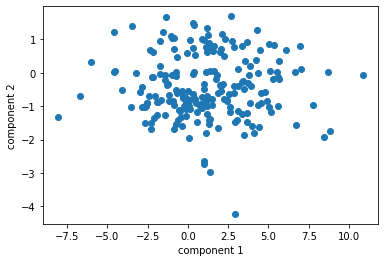

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x_pca[:, 0], x_pca[:, 1],)
plt.xlabel('component 1')
plt.ylabel('component 2')

Text(0, 0.5, 'component 3')

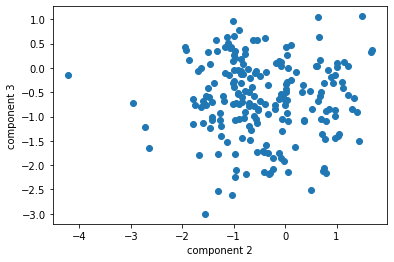

In [20]:
plt.scatter(x_pca[:, 1], x_pca[:, 2],)
plt.xlabel('component 2')
plt.ylabel('component 3')

Text(0, 0.5, 'component 3')

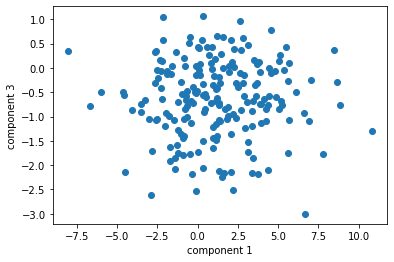

In [21]:
plt.scatter(x_pca[:, 0], x_pca[:, 2],)
plt.xlabel('component 1')
plt.ylabel('component 3')

d) After seeing the projection, I agree with my results from part(c) because we do not see any relationship or clear pattern between the components, which suggests that the first principal components already explained the most variance of this dataset, and other principal components do not contribute much.

Extracredit (difficult)

We know that the principal compoenents directions or eigenvectors are calculated based on the variance of the data. In order to prove that Bessel's correction does not affect the principal component directions, we need to show that the Bessel's correction is an unbiased estimator of the variance. 

In Bias of Sample Variance,
$E(\frac{1}{m}(X^TX-m\bar{x}\bar{x}^T))=(1-\frac{1}{m})(X^TX-m\bar{x}\bar{x}^T)$

Then, $nE(\frac{1}{m}(X^TX-m\bar{x}\bar{x}^T))=E((X^TX-m\bar{x}\bar{x}^T)) = n(1-\frac{1}{m})(X^TX-m\bar{x}\bar{x}^T) = (n-1)(X^TX-m\bar{x}\bar{x}^T) $

 Thus, $(X^TX-m\bar{x}\bar{x}^T) = \frac{1}{m-1}E(X^TX-m\bar{x}\bar{x}^T) = E(\frac{1}{m-1}(X^TX-m\bar{x}\bar{x}^T))$

 Now we see that the Bessel's correction of variance is an unbiased estimator of the orginial variance, so when we calculate the principal component, it would not affect either eigenvalues or eigenvectors.



IV. K-meanrs Clustering

a)  

*   We have clusters that don’t look like a ’blob’ i.e the clusters are elongated shapes,our k-means algorithm may not find the correct cluster centers. 
*   We may have unevenly sized clusters. In this case, k-means does not always fail.
When these clusters are well separated, it is easy to correctly classify the data. If
the clusters are not separated far enough, large clusters may be artificially split into
smaller clusters, and datapoints from the truly smaller clusters may merge into one of
these split clusters.
.

b) Because the the centroid positions are initially choosen at random, K-means will likely give different results each time it is run, so we need to run K-mean multiple times and select the best score.

c) 0 since each data point is it own cluster.

d) $\sum^m_{i=1}||x^{(i)}-\bar{x}||^2$

e) J would decrease as there are more clusters with fewer datapoints, where the datapoints are closer to their corresponding centroids.


 

V. Multilayer Perceptron (Difficult)

a) Let $g^{(j)}(x) = W^{(j)T}x+b^{(j)}$

$\frac{dL}{dW_{21}^{(1)}}=(o_1-y)f'(g^{(3)}(\overrightarrow{h^{(2)}}))W_1^{(3)}f'(g^{(2)}(\overrightarrow{h^{(1)}}))W_1^{(2)}f'(g^{(3)}(\overrightarrow{x}))x_2$

b) $\frac{dL}{dW_{22}^{(1)}},\frac{dL}{dW_{12}^{(1)}},\frac{dL}{db_{1}^{(1)}}$ since these contains the partial derivative of  $\frac{dL}{dW_{21}^{(2)}}$. during the back-propogation.

c)In regression, we use linear activation function for the output layer, therefore, it is typical to use MSE loss. 